**Students:**
- Alexandre Alves
- Francisco de Assis
- Kaio Henrique

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
from operator import itemgetter
import pprint

In [ ]:
Dg = nx.read_graphml("NFL-2022-02-15.graphml")

# Degree

Como poderemos ver a seguir, a maioria dos nós possui tanto um out degree quanto um in degree bem baixo, próximo de zero. Dada a nossa rede de estudo isso faz sentido visto que a maioria das pessoas não retweeta ou tem retweets da maioria das pessoas da rede.

In [ ]:
degreeDict = nx.degree_centrality(Dg)

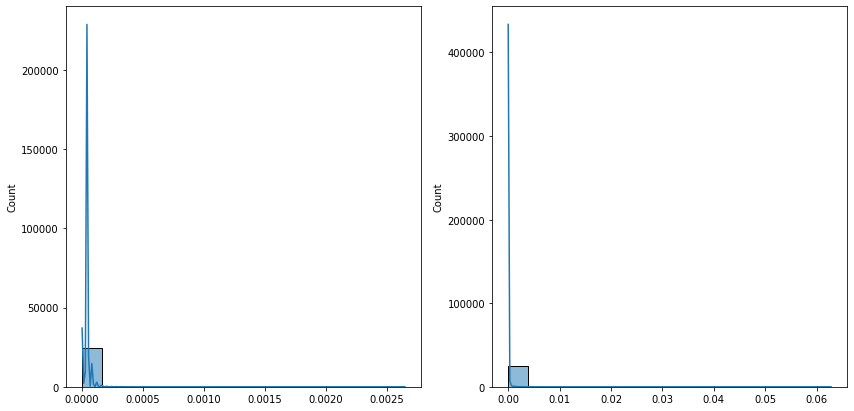

In [ ]:
indegreeDict = nx.in_degree_centrality(Dg)
outdegreeDict = nx.out_degree_centrality(Dg)

fig, ax =plt.subplots(1,2, figsize=(14, 7))

sns.histplot(indegreeDict, ax=ax[0], kde=True)
sns.histplot(outdegreeDict, ax=ax[1], kde=True)
fig.show()

Também faz sentido que a outdegree centrality apresente valores maiores do que a indegree centrality visto que é de conhecimento comum que contas do twitter mais conhecidas podem receber milhares de retweets diariamente enquanto uma única pessoa não consegue fazer mais que uma centena por dia.


In [ ]:
print("Outdegree centrality top 10 nodes")
pprint.pprint({key: outdegreeDict[key] for key in sorted(outdegreeDict, key=outdegreeDict.get, reverse=True)[:10]})
print("Indegree centrality top 10 nodes")
pprint.pprint({key: indegreeDict[key] for key in sorted(indegreeDict, key=indegreeDict.get, reverse=True)[:10]})

Outdegree centrality top 10 nodes
{'1218Sports': 0.02111988280296248,
 'Brother_nfts': 0.06278994058761293,
 'Endzone_Brasil': 0.04773337673964353,
 'OddsCheckerUS': 0.019614226418165542,
 'ShibaNFTXRPL': 0.010173353951330675,
 'UndergroundBrks': 0.013917148205420364,
 'WCoastScouting': 0.019247985675917637,
 'jollenelevid': 0.01985838691299748,
 'nflextra': 0.011475543257101001,
 'nflrums': 0.010336127614551965}
Indegree centrality top 10 nodes
{'FranchiseTagUK': 0.000691788068690486,
 'MikePrE57': 0.0006104012370798405,
 'NFLProPicks': 0.0006510946528851632,
 'NFLdeutsch': 0.0013428827215756492,
 'SportsTimeHQ': 0.0006510946528851632,
 'TITTHJB': 0.0010173353951330676,
 'nflttbr': 0.0022381378692927483,
 'theffrobot': 0.0026450720273459754,
 'topfanscorner': 0.0014649629689916172,
 'touchdownbot': 0.0023602181167087168}


In [ ]:
degreeArray = []

for key, value in dict(Dg.out_degree()).items():
    degreeArray.append([key, value])
degreeDF = pd.DataFrame(degreeArray, columns=["screen_name", "degree"])

degreeDF = degreeDF.sort_values(by="degree", ascending=False)
degreeDF.head(10)

,screen_name,degree
1089,Brother_nfts,1543
85,Endzone_Brasil,1173
1020,1218Sports,519
986,jollenelevid,488
588,OddsCheckerUS,482
1779,WCoastScouting,473
433,UndergroundBrks,342
105,nflextra,282
118,nflrums,254
1175,ShibaNFTXRPL,250


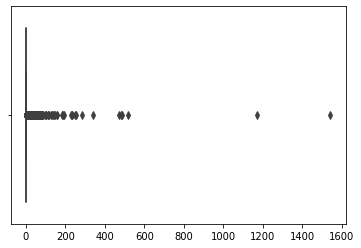

In [ ]:
degreeList= []

for key, value in dict(Dg.out_degree()).items():
    degreeList.append(value)

sns.boxplot(x=degreeList)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Closeness

Neste tópico abordaremos o *closeness* dos **Nós**, ou melhor, a proximidade que cada Nó tem com os demais da rede, em o nosso contexto tal métrica pode ser interpretada como o caminho que uma conta tem através de retweets em comum. Observe a seguir:

In [ ]:
closenessDict = nx.closeness_centrality(Dg)

In [ ]:
closenessArray = []

for key, value in dict(closenessDict).items():
    closenessArray.append([key, value])
closenessDF = pd.DataFrame(closenessArray, columns=["screen_name", "closeness"])

closenessDF = closenessDF.sort_values(by="closeness", ascending=False)
closenessDF.head(10)

,screen_name,closeness
2513,theffrobot,0.002398
2267,touchdownbot,0.002323
1297,nflttbr,0.002244
2899,topfanscorner,0.001436
9041,NFLdeutsch,0.001346
13797,TITTHJB,0.001088
21064,Margari62004809,0.001039
10626,madisonlake606,0.001028
4041,SportsCardBOT,0.000987
6289,Sabrina63967774,0.000967


Como foi visto na última seção do `colab` onde buscamos os dados para análise, é pontuado a quantidade de pequenas comunidades que o grafo possui, isso significa que o grafo se torna muito espesso gerando uma longa distãncia entre cada nó com os demais a qual estão de alguma forma ligados. Percebe-se na tabela que mesmo a conta que possui maior valor de proximidade (theffrobot), tem um valor muito pequeno, e que diminui rapidamente até a décima colocação, mostrando o quão subdividida e ampla é as conexões do Twitter.

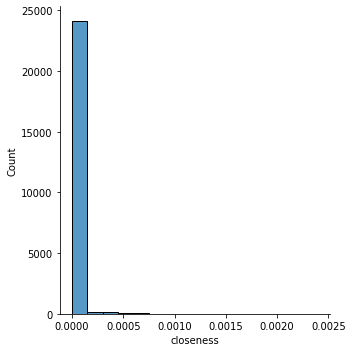

In [ ]:
sns.displot(closenessDF.closeness)

# Betweenness

Tendo em mente como um fluxo de informações em redes sociais funcionam, é pertinente o interesse sobre por onde esses dados se ligam e como eles percorrem a rede, e consequentemente por onde eles mais transitam, e é exatamente isso que é calculado utilizando intermediação, ou como descrito no tópico, o *betweenness*, que nos mostra as contas que têm maior intermédio entre dados.

In [ ]:
betweennessDict = nx.betweenness_centrality(Dg)

In [ ]:
betweennessArray = []

for key, value in dict(betweennessDict).items():
    betweennessArray.append([key, value])
betweennessDF = pd.DataFrame(betweennessArray, columns=["screen_name", "betweenness"])

betweennessDF = betweennessDF.sort_values(by="betweenness", ascending=False)
betweennessDF.head(10)

,screen_name,betweenness
4400,PatriotsGirlUSA,7.486278e-06
7596,PTSportsFix,7.233750e-06
9100,GoodOldBoysFF,2.403368e-06
80,Broadwayhatpod,2.201420e-06
2899,topfanscorner,2.083275e-06
9402,PeterSaverio,1.825413e-06
4019,sportingbuzz_,1.343033e-06
6292,PigskinPapers,1.232857e-06
11658,ELONONE3,9.464163e-07
12680,AATSports_,8.631894e-07


Por termos uma grande rede com poucas conexões ligando as pequenas conversações existentes, obtemos um cálculo de *betweenness* que calcula as variáveis e retorna valores extremamente pequenos, mas que fazem sentido, pois a conta que possui maior valor, compartilha conteúdo dedicadamente sobre o tema que escolhemos.

# EigenVector Centrality

No contexto de grafos é interessante identificar a "influência" que cada **nó** exerce sobre os outros e assim determinar os **nós** que possuem mais "importância". Para entender melhor, cada **nó** em uma rede possui um grau de influência sobre os **nós** a qual eles estão ligados, assim eles exercem uma certa influência sobre os outros adjacentes e vice-versa.

In [ ]:
eigenvectorDict = nx.eigenvector_centrality(Dg)

In [ ]:
eigenvectorArray = []

for key, value in dict(eigenvectorDict).items():
    eigenvectorArray.append([key, value])
eigenvectorDF = pd.DataFrame(eigenvectorArray, columns=["screen_name", "eigenvector"])

eigenvectorDF = eigenvectorDF.sort_values(by="eigenvector", ascending=False)
eigenvectorDF.head(10)

,screen_name,eigenvector
13797,TITTHJB,0.264651
18184,Paul_Ryan15,0.203792
9403,MikePrE57,0.202336
13294,SportsTimeHQ,0.190476
3296,LogoHog,0.181380
7754,FIToday_,0.181380
10426,ChiefCFS,0.181380
17290,NFLProPicks,0.173513
11096,JNforsports,0.170853
12663,sportsblisswit1,0.170853


Infelizmente a utilização dessa métrica não é tão significativa para o nosso cenário, note, mesmo que uma conta no twitter tenha muitas conexões com outras contas contas bastante influentes isso não a torna influente em todas as situações, ou seja, uma conta que retweeta publicações de pessoas com bastante visibilidade não necessariamente possui uma popularidade no mesmo nível. Observe o primeiro na tabela que possui o maior `eigenvector` que nem mesmo aparece no Top 10 de maior grau antes visto.

# Análise Bivariada

Como relatado em outras partes do estudo, estamos lidando com uma rede muito dispersa, ou seja, uma grande quantidade de pequenas interações isoladas, isso faz com que a contagem de contas(Nós), que possuem poucas interações(retweets), são muitas, como vemos no gráfico a seguir.

In [ ]:
degree_sequence = sorted([d for n, d in Dg.degree()], reverse=True)

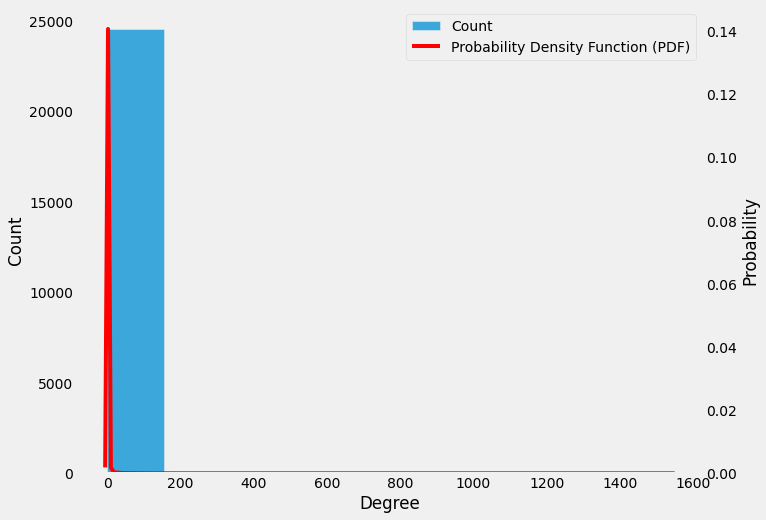

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=10,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

É possível observar a quantidade de contas que estão perto do zero em contagem de compartilhamentos.

# Análise Multivariada

Partindo do que nós já obervamos e vendo os gráficos a seguir podemos novamente reafirmar algumas das nossas descobertas anteriores.

In [ ]:
Dg.remove_edges_from(nx.selfloop_edges(Dg))

In [ ]:
bc = pd.Series(betweennessDict)
dc = pd.Series(degreeDict)
ec = pd.Series(eigenvectorDict)
cc = pd.Series(closenessDict)

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.000041,4.618851e-12,0.000000
1,0.0,0.000041,6.466392e-11,0.000041
2,0.0,0.000163,4.618851e-12,0.000000
3,0.0,0.000041,6.466392e-11,0.000041
4,0.0,0.000041,4.618851e-12,0.000000


Quando olhamos o primeiro subgrafo, o betweenness e betweenness nós vemos uma distribuição de calda longa, o que nos indica que um grande número de nós com um betweenes baixo enquanto alguns poucos tem um valor maior.

Observando o segundo subgráfico, Betweenness e Degree, nós percebemos também que apesar do  degree aumentar não aumenta o betweenness. E que há um pico de valores com degree baixo e betweenness alto.

Nós demais gráficos não tem uma relação muito clara de como as medidas de centralidade interferem umas nas outras, em parte pode ser causado pelo fato da rede ser muito esparsa.

O subgráfico que voltamos a ter um grau considerável de informação é o gráfico que relaciona EigenVector e Closeness. Podemos oberservar uma pequena correlação entre eles junto de alguns outliers.

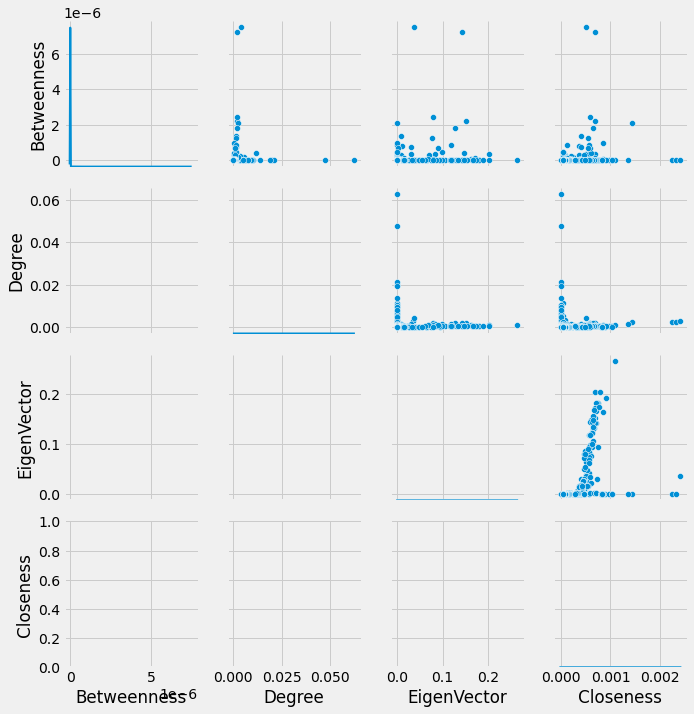

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_diag(sns.kdeplot, lw=2, legend=False)
#fig.map_lower(sns.kdeplot, cmap="Reds_r")

plt.savefig('multi.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

# Análise de Decomposição

Para uma rede desse tamanho, temos um número bem pequeno de camadas, apenas de 11. A maioria dos nós tem grau muito pequeno e é uma rede bastante esparsa como já descoberto anteriormente. Essas informações apenas reforçam o que as nossas análises anteriores já mostraram.

In [ ]:
set([v for k,v in nx.core_number(Dg).items()])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

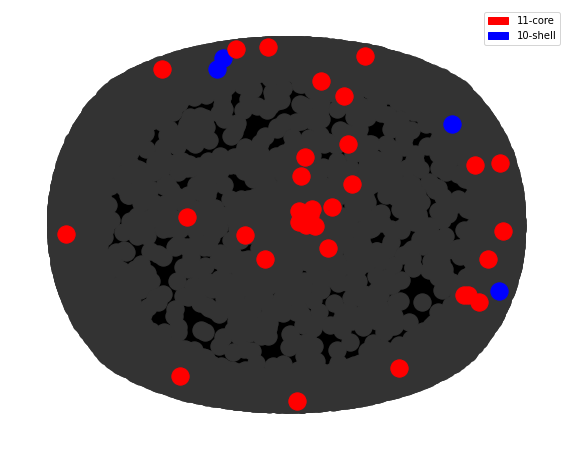

In [ ]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_10 = nx.k_shell(Dg, 10)
g_core_11 = nx.k_core(Dg, 11)

# layout position
pos = nx.spring_layout(Dg,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(Dg,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(Dg,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_10,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_11,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='11-core')
blue_patch = mpatches.Patch(color='blue', label='10-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core.png', transparent=True,dpi=600)
plt.show()

In [ ]:
list(g_core_10)

['vegasfeverpod', 'WeeklyAudible', 'wendellwallace', 'JeffWarnerNFL']

In [ ]:
list(g_core_11)

['AATSports_',
 'Rbloss64',
 'LogoHog',
 'ToTheHizzy',
 'Paul_Ryan15',
 'FinSports2',
 'SportsTimeHQ',
 'FANTASYBROZ1',
 'JNforsports',
 'UnderCentrePod',
 'JakesFFootball',
 'NFLProPicks',
 'PigskinPapers',
 'joes_talk',
 'GoodOldBoysFF',
 'MikePrE57',
 'MintSports',
 '3rdShortPod',
 'TITTHJB',
 'FranchiseTagUK',
 'PTSportsFix',
 'Broadwayhatpod',
 'CHUBZBURGER',
 'AATBirds',
 'sportsblisswit1',
 'bellyupmdffshow',
 'PeterSaverio',
 'TMSMpodcast',
 'DSM_Media',
 'FIToday_',
 'ChiefCFS',
 'AdamHulseSports']